# Dépendance

In [165]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np


from pandas_profiling import ProfileReport


from sklearn.model_selection import train_test_split as TTS
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier as RNC
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.decomposition import PCA
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import plotly.express as px
import plotly as py 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle


import warnings
warnings.filterwarnings("ignore")

# Function

In [73]:
accuracy = lambda p,y: (p==y).sum()/p.shape[0]

In [74]:
# Function de prediction avec l'algorithme KNeighbors
def knn_predict(X,Y,size=0.2, seed=777, K=3):
    splits = TTS(X,
                 Y,
                 train_size=size,
                 stratify=Y,
                 random_state=seed
                )
    X_train, X_test, Y_train, Y_test = splits
    knn = KNN(n_neighbors=K)
    knn.fit(X_train, Y_train)
    prediction = knn.predict(X_test)
    proba = knn.predict_proba(X_test)
    print(accuracy(prediction, Y_test))
    print()
    print(proba)
    return ( X_train, X_test, Y_train, Y_test, proba )

In [75]:
# Function de prediction avec l'algorithme RandomForest
def rfc_predict(X,Y,size=0.2, seed=777):
    splits = TTS(X,
                 Y,
                 train_size=size,
                 stratify=Y,
                 random_state=seed
                )
    X_train, X_test, Y_train, Y_test = splits
    rfc = RFC()
    rfc.fit(X_train, Y_train)
    prediction = rfc.predict(X_test)
    proba = rfc.predict_proba(X_test)
    print(accuracy(prediction, Y_test))
    print()
    print(proba)
    return ( X_train, X_test, Y_train, Y_test, proba )

In [76]:
# Function de prediction avec l'algorithme RadiusNeighbors
def rnc_predict(X,Y,size=0.2, seed=777):
    splits = TTS(X,
                 Y,
                 train_size=size,
                 stratify=Y,
                 random_state=seed
                )
    X_train, X_test, Y_train, Y_test = splits
    rnc = RNC()
    rnc.fit(X_train, Y_train)
    prediction = rnc.predict(X_test)
    proba = rnc.predict_proba(X_test)
    print(accuracy(prediction, Y_test))
    print()
    print(proba)
    return ( X_train, X_test, Y_train, Y_test, proba )

In [168]:
# Fonction d'affichage de la matrice de confusion
def show_cm(cm, labels):
    print("Matrice de confusion :")
    df = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df, annot=True)
    plt.show()

# Variable

In [77]:
# Import de la ressource csv Boston Crime
data = pd.read_csv('Data/crime.csv', engine="python")

# Boston Crime 

Petite introduction.

In [78]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


# Nettoyage de la dataset

Raison du nettoyage

In [79]:
# Copy du data de base puis renommage des colonnes afin de mieux les exploités.
clean = data.copy()
clean = clean.rename(columns={
         'INCIDENT_NUMBER':'Id_incident',
         'OFFENSE_CODE': 'Code',
         'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'UCR_PART':'UCR',
         'STREET':'Street'})
clean.head()

,Id_incident,Code,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR,Street,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [80]:
# Remplacement des variables vides dans la colonne "Shooting" en N pour pouvoir avoir les crimes sans arme à feu et transformation de la Date
clean['Shooting'].fillna('N', inplace=True)
clean['Date'] = pd.to_datetime(clean['Date'])

In [81]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Id_incident  319073 non-null  object        
 1   Code         319073 non-null  int64         
 2   Group        319073 non-null  object        
 3   Description  319073 non-null  object        
 4   District     317308 non-null  object        
 5   Area         319073 non-null  object        
 6   Shooting     319073 non-null  object        
 7   Date         319073 non-null  datetime64[ns]
 8   Year         319073 non-null  int64         
 9   Month        319073 non-null  int64         
 10  Day          319073 non-null  object        
 11  Hour         319073 non-null  int64         
 12  UCR          318983 non-null  object        
 13  Street       308202 non-null  object        
 14  Lat          299074 non-null  float64       
 15  Long         299074 non-null  floa

In [82]:
clean.District.unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [83]:
clean['District'].fillna('Unknown', inplace=True)
clean.District.unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'Unknown', 'A1', 'E5', 'A7',
       'E13', 'E18', 'A15'], dtype=object)

In [84]:
clean.District.unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'Unknown', 'A1', 'E5', 'A7',
       'E13', 'E18', 'A15'], dtype=object)

In [85]:
# Rename des noms des districts en nom plutôt qu'en code (Référence : https://bpdnews.com/districts)
districts = {
'D14':'Brighton',
'C11':'Dorchester',
'D4':'South End',
'B3':'Mattapan',
'B2':'Roxbury',
'C6':'South Boston',
'A1':'Downtown',
'E5':'West Roxbury',
'A7':'East Boston',
'E13':'Jamaica Plain',
'E18':'Hyde Park',
'A15':'Charlestown',
}

clean['DistrictName'] = clean.District.map(districts)

In [86]:
clean['DistrictName'].fillna('Unknown', inplace=True)
clean.DistrictName.unique()

array(['Brighton', 'Dorchester', 'South End', 'Mattapan', 'Roxbury',
       'South Boston', 'Unknown', 'Downtown', 'West Roxbury',
       'East Boston', 'Jamaica Plain', 'Hyde Park', 'Charlestown'],
      dtype=object)

In [87]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Id_incident   319073 non-null  object        
 1   Code          319073 non-null  int64         
 2   Group         319073 non-null  object        
 3   Description   319073 non-null  object        
 4   District      319073 non-null  object        
 5   Area          319073 non-null  object        
 6   Shooting      319073 non-null  object        
 7   Date          319073 non-null  datetime64[ns]
 8   Year          319073 non-null  int64         
 9   Month         319073 non-null  int64         
 10  Day           319073 non-null  object        
 11  Hour          319073 non-null  int64         
 12  UCR           318983 non-null  object        
 13  Street        308202 non-null  object        
 14  Lat           299074 non-null  float64       
 15  Long          299

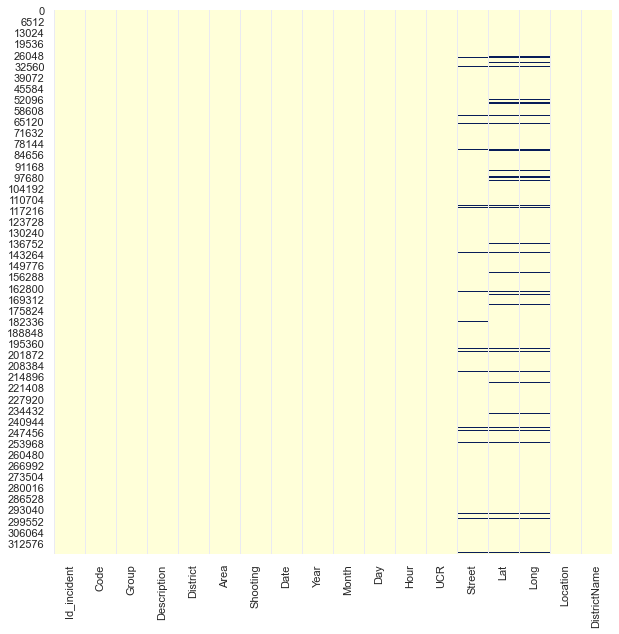

In [88]:
# Vérification des données null restant
plt.figure(figsize=(10,10))
sns.heatmap(clean.isnull(),cbar=False, cmap='YlGnBu')
plt.ioff()

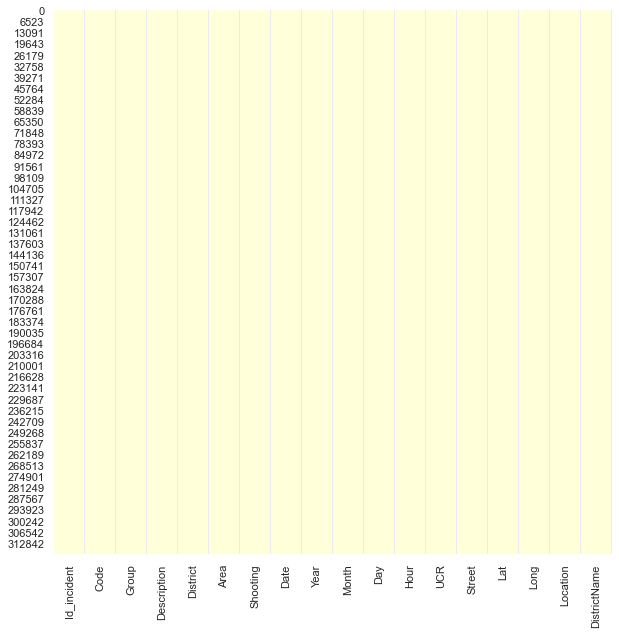

In [89]:
clean = clean.dropna(axis=0)
plt.figure(figsize=(10,10))
sns.heatmap(clean.isnull(),cbar=False, cmap='YlGnBu')
plt.ioff()

In [90]:
#Export de la dataset clean
clean.to_csv("Data/crime_clean.csv")

In [91]:
# Cleaning Hors Analyse
mlclean = clean.copy()

mlclean.drop("Description", axis=1, inplace = True)
mlclean.drop("Date", axis=1, inplace = True)
mlclean.drop("Street", axis=1, inplace = True)
mlclean.drop("Location", axis=1, inplace = True)
mlclean.drop("Shooting", axis=1, inplace = True)
mlclean.drop("Hour", axis=1, inplace = True)
mlclean.drop("Code", axis=1, inplace = True)
mlclean.drop("Area", axis=1, inplace = True)
mlclean.drop(mlclean[mlclean["Lat"].isnull()].index, inplace=True)
mlclean.drop(mlclean[mlclean["District"].isnull()].index, inplace=True)
mlclean = mlclean.loc[(mlclean['Lat']>40) & (mlclean['Long'] < -60)]
mlclean['count'] = 1

# Analyse de la Dataset

## Evolution des crimes au cours de l'année

In [92]:
data = data.rename(columns={
         'INCIDENT_NUMBER':'Id_incident',
         'OFFENSE_CODE': 'Code',
         'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'UCR_PART':'UCR',
         'STREET':'Street'})

# Copie de la dataset clean
df1 = data.copy()

#Configuration de l'index en date
df1.index = pd.DatetimeIndex(df1.Date)

df1.resample('M').size()

Date
2015-06-30    4191
2015-07-31    8324
2015-08-31    8342
2015-09-30    8414
2015-10-31    8308
2015-11-30    7818
2015-12-31    7991
2016-01-31    7835
2016-02-29    7308
2016-03-31    8199
2016-04-30    8101
2016-05-31    8578
2016-06-30    8558
2016-07-31    8619
2016-08-31    8938
2016-09-30    8522
2016-10-31    8583
2016-11-30    7922
2016-12-31    7951
2017-01-31    7993
2017-02-28    7408
2017-03-31    8179
2017-04-30    8069
2017-05-31    8715
2017-06-30    8985
2017-07-31    9075
2017-08-31    9206
2017-09-30    8940
2017-10-31    8846
2017-11-30    7935
2017-12-31    7535
2018-01-31    7782
2018-02-28    6937
2018-03-31    7768
2018-04-30    7916
2018-05-31    8906
2018-06-30    8834
2018-07-31    8538
2018-08-31    8337
2018-09-30     667
Freq: M, dtype: int64

A partir de ce retour, nous pouvons voir que **les données commencent le 30 juin 2015 et finissent le 30 août 2018.**

In [93]:
moisdf = df1.resample('M').size().to_frame(name="Total")
moisdf = moisdf.reset_index(level='Date')


aff = px.line(moisdf, x=moisdf.Date, y=moisdf.Total)
aff.update_layout(
    title='Nombre de crimes par Mois (entre 2015 et 2018)',
    xaxis_title='Mois',
    yaxis_title='Nombre de crimes'
)
aff.show()

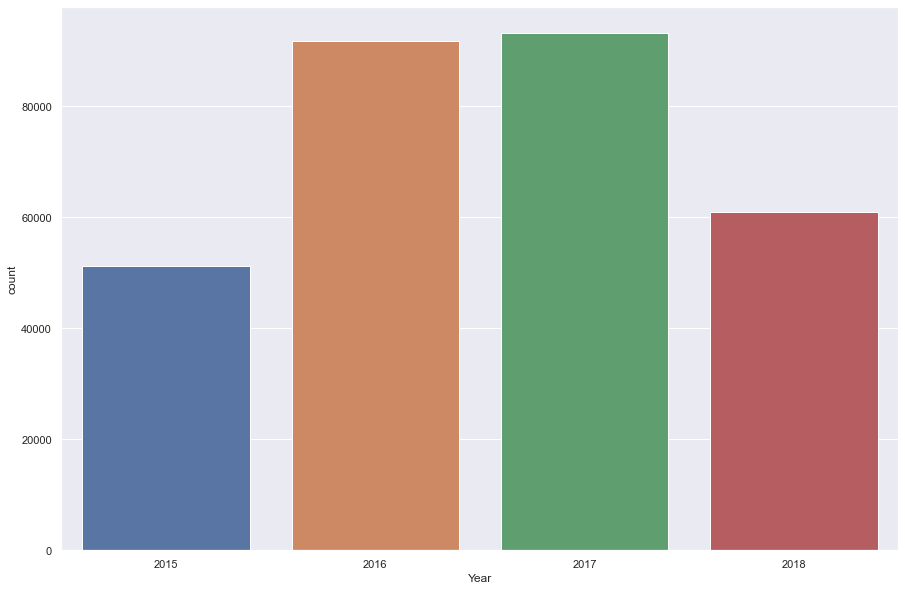

In [94]:
plt.figure(figsize=(15,10))
sns.countplot(data=clean, x='Year')
plt.ioff()

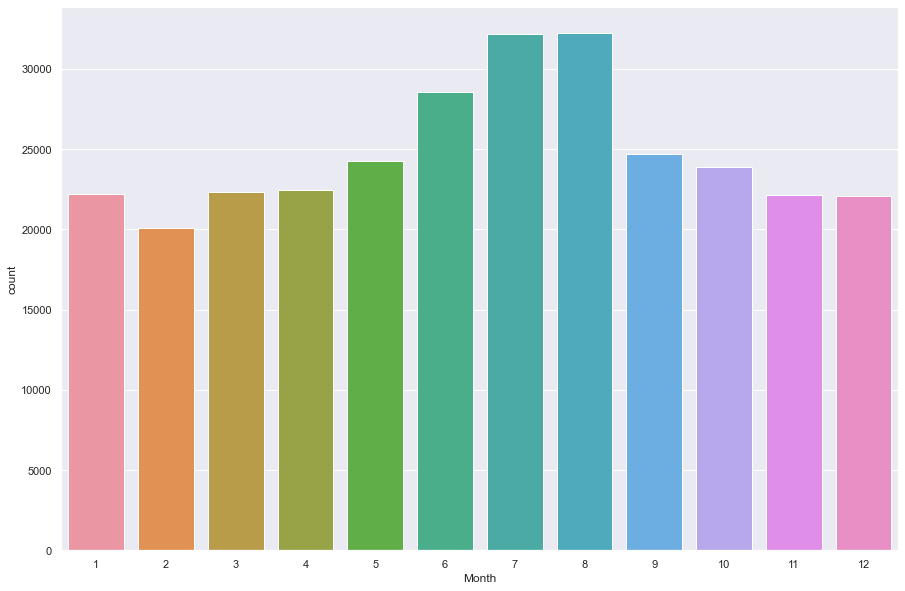

In [95]:
plt.figure(figsize=(15,10))
sns.countplot(data=clean, x='Month')
plt.ioff()

En regardant en approfondi, nous pouvons voir qu'ils y a plus de crime en été. 
Nous allons donc essayer de comprendre quels sont les crimes majoritaires. Pour facilité la tache, je vais regroupé les crimes entre eux afin d'avoir une meilleur visibilité.

In [96]:
violation = clean[clean.Group.str.contains('Violation')]
assault = clean[clean.Group.str.contains('Assault')]
burglary = clean[clean.Group.str.contains('Burglary')]
harassment = clean[clean.Group.str.contains('Harassment')]
larceny = clean[clean.Group.str.contains('Larceny|Theft')]
larceny = larceny[~larceny.Group.str.contains('Recovery')]
killing = clean[clean.Group.str.contains('Manslaughter|Homicide')]
fraud = clean[clean.Group.str.contains('Confidence Games|Fraud|Counterfeiting')]
mv_accident = clean[clean.Group.str.contains('Accident')]
robbery = clean[clean.Group.str.contains('Robbery')]
disputes = clean[clean.Group.str.contains('Verbal Disputes')]
vandalism = clean[clean.Group.str.contains('Vandalism')]

violation.insert(0, 'Category', 'Violation')
assault.insert(0, 'Category', 'Assault')
burglary.insert(0, 'Category', 'Burglary')
harassment.insert(0, 'Category', 'Harrassment')
larceny.insert(0, 'Category', 'Larceny')
killing.insert(0, 'Category', 'Killing') 
fraud.insert(0, 'Category', 'Fraud')
mv_accident.insert(0, 'Category', 'Motor vehicle accident')
robbery.insert(0, 'Category', 'Robbery')
disputes.insert(0, 'Category', 'Verbal disputes')
vandalism.insert(0, 'Category', 'Vandalism')

tempframes = [violation, assault, burglary, harassment, larceny, killing, fraud, mv_accident, robbery, disputes, vandalism]
clean_category = pd.concat(tempframes)
clean_category

,Category,Id_incident,Code,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR,Street,Lat,Long,Location,DistrictName
17,Violation,I182070918,3305,Assembly or Gathering Violations,DEMONSTRATIONS/RIOT,D4,130,N,2018-09-03 17:00:00,2018,9,Monday,17,Part Three,HUNTINGTON AVE,42.348577,-71.077720,"(42.34857652, -71.07772012)",South End
28,Violation,I182070904,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,242,N,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)",Dorchester
30,Violation,I182070901,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,B3,428,N,2018-09-03 18:41:00,2018,9,Monday,18,Part Two,CLARKWOOD ST,42.280137,-71.090798,"(42.28013735, -71.09079826)",Mattapan
76,Violation,I182070849,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,177,N,2018-09-03 11:30:00,2018,9,Monday,11,Part Two,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",South Boston
91,Violation,I182070833,2905,Violations,VAL - OPERATING WITHOUT LICENSE,D14,780,N,2018-09-03 14:06:00,2018,9,Monday,14,Part Two,FANEUIL ST,42.354794,-71.149958,"(42.35479369, -71.14995785)",Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318682,Vandalism,I152049493,1402,Vandalism,VANDALISM,B3,444,N,2015-06-15 05:26:00,2015,6,Monday,5,Part Two,ESMOND ST,42.298620,-71.085110,"(42.29861988, -71.08511004)",Mattapan
318695,Vandalism,I152049477,1402,Vandalism,VANDALISM,B3,466,N,2015-06-15 12:00:00,2015,6,Monday,12,Part Two,ESTELLA ST,42.286874,-71.094571,"(42.28687441, -71.09457079)",Mattapan
318699,Vandalism,I152049463,1402,Vandalism,VANDALISM,E18,493,N,2015-06-15 00:03:00,2015,6,Monday,0,Part Two,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)",Hyde Park
318824,Vandalism,I142049917-00,1402,Vandalism,VANDALISM,C11,395,N,2015-09-03 13:00:00,2015,9,Thursday,13,Part Two,DORCHESTER AVE,42.285260,-71.064441,"(42.28526024, -71.06444063)",Dorchester


<AxesSubplot:xlabel='Category', ylabel='count'>

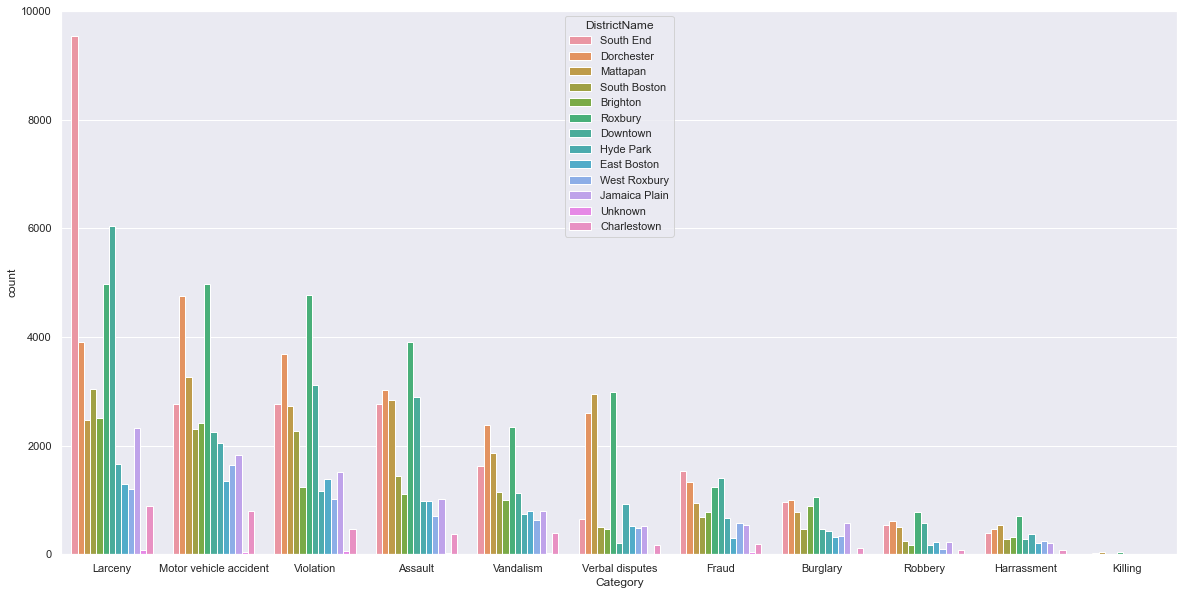

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Category', 
              data = clean_category, 
              order = clean_category.Category.value_counts().index, 
              hue='DistrictName'
             )

Nous pouvons voir qu'il y a une barre dominante "Larceny" dans le district de "South End". 

Voyons maintenant le nombre de crime par heure.

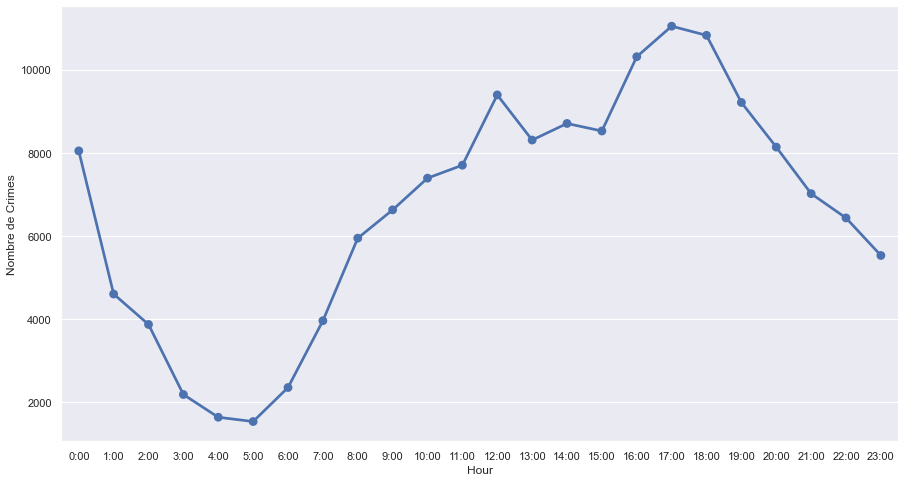

In [98]:
# tableau représentant les 10 crimes les plus présents dans le dataset 
top10_catcrime = ['Larceny','Motor vehicle accident', 'Violation', 'Assault', 'Vandalism', 'Verbal disbutes', 'Fraud', 'Burglary', 'Robbery','Harrassment']

# Copie de la dataframe de category
crime_time = clean_category.copy()

# Création de la variable crime_time en prenant seulement les catégories du Top 10
crime_time = crime_time[crime_time['Category'].isin(top10_catcrime)]

# Modification de l'index en heure
crime_time = crime_time.groupby('Hour').size().reset_index(name = 'Nombre de Crimes')

# Conversion des heures en 0:00 / 10:00
crime_time['Hour'] = crime_time['Hour'].apply(lambda i: str(i)+':00')

# Affichage du point plot de crime_time
plt.figure(figsize=(15,8))
sns.pointplot(data = crime_time, x = 'Hour', y = 'Nombre de Crimes')
plt.show()

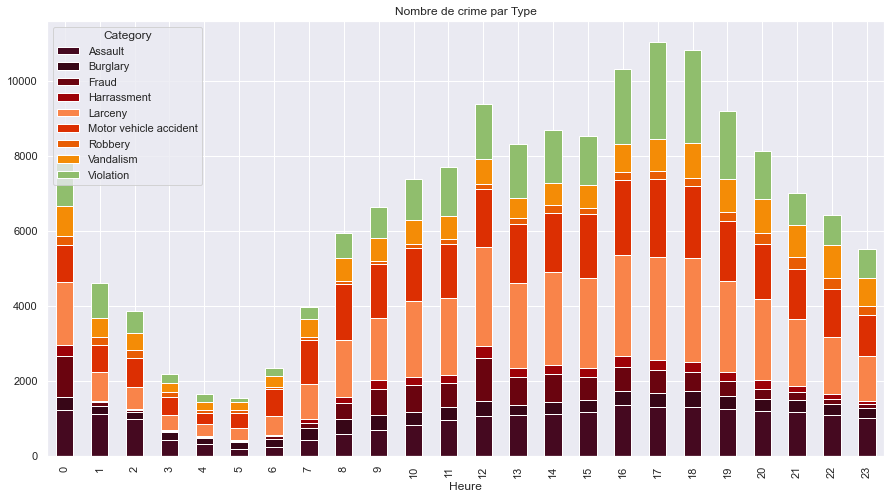

In [99]:
# Crimes par groupe 
crime_type = clean_category.copy()
crime_type = crime_type[crime_type['Category'].isin(top10_catcrime)]
crime_type= crime_type.groupby(['Hour','Category']).size().reset_index(name = 'Nombre de crimes')
crime_type['Hours'] = crime_type['Hour'].apply(lambda i: str(i)+':00')

# Pivot table
crime_type = pd.pivot_table(crime_type, index=['Hour'], columns=['Category'], values='Nombre de crimes', aggfunc=np.sum)

# Couleurs des catégories a afficher sur le graphique
colorCategory = ['#450920','#370617','#6a040f','#9d0208','#f9844a','#dc2f02','#e85d04','#f48c06','#90be6d','#4d908e']

# Affichage du barplot de crime_time
crime_type.plot(kind= 'bar', stacked = True, figsize=(15,8),color=colorCategory)
plt.title('Nombre de crime par Type')
plt.xlabel('Heure')
plt.show()

Ce graphique nous permet de voir les crimes par heure. On voit bien que de 16 à 18 heures, le nombre de crime augmente.
Mies à part celà, nous pouvons voir que comparait aux autres barres celles-ci a une plus grosse portions de "Violation".

Text(0.5, 1.0, 'All Crime Distribution per District')

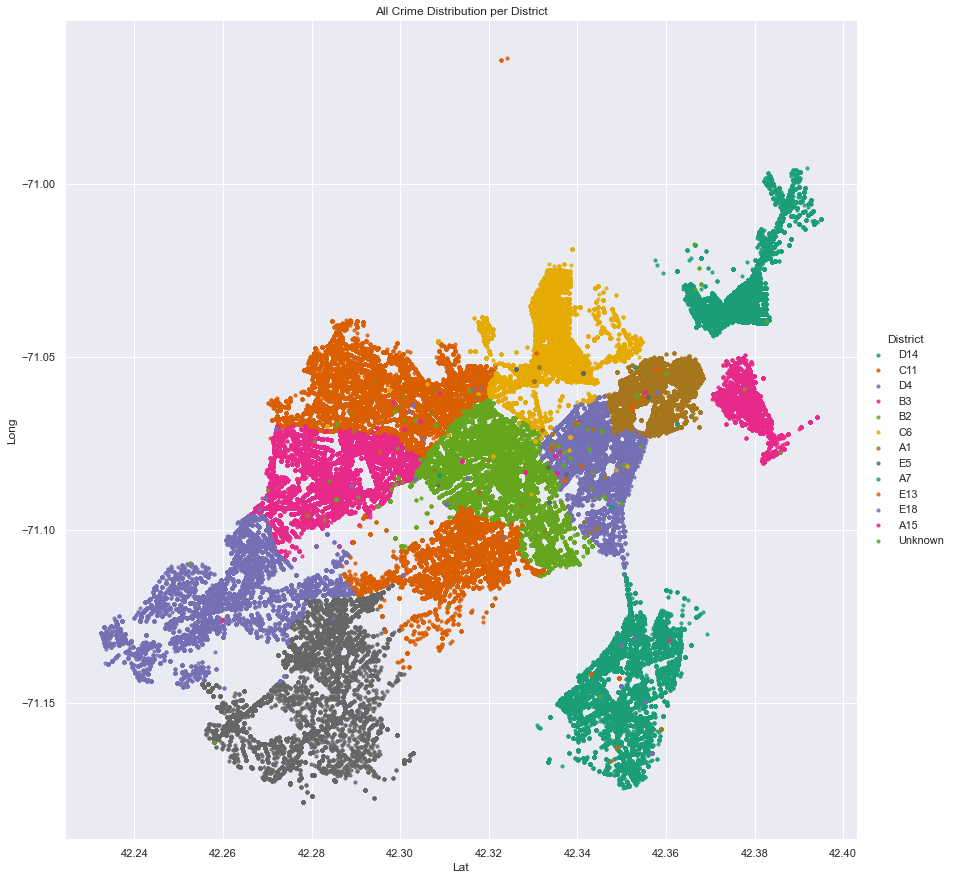

In [100]:
sns.lmplot('Lat', 
           'Long',
           data=clean.loc[(clean['Lat'] > 40) & (clean['Long'] < -60)],
           fit_reg=False, 
           hue = 'DistrictName',
           palette ='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

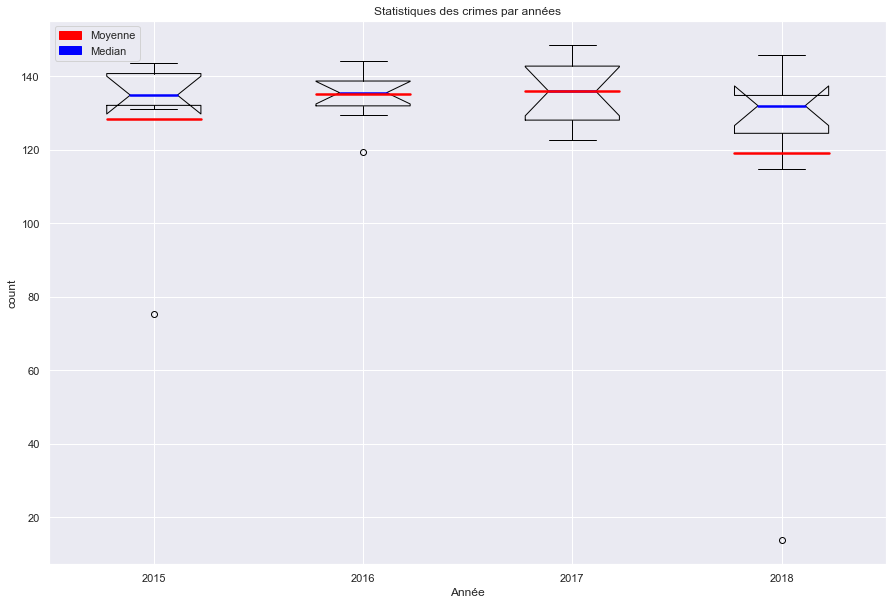

In [101]:
box = mlclean.groupby(['Year','Month','Group'])['count'].sum().to_frame()
boxmean = box.groupby(['Year', 'Month'])['count'].mean().to_frame()
boxh = boxmean.unstack().T


meanPatch = mpatches.Patch(linestyle='-', label='Moyenne', color='red')
medianPatch = mpatches.Patch(linestyle='-', label='Median', color='blue')
meanlineprops = dict(linestyle='-', linewidth=2.5, color='red')
medianprops = dict(linestyle='-', linewidth=2.5, color='blue')
plt.figure(figsize=(15,10))
plt.boxplot([s.dropna() for col, s in boxh.iteritems()],positions=[2015,2016,2017,2018],notch=True,meanprops=meanlineprops,medianprops=medianprops, meanline=True, showmeans=True)
plt.xlabel('Année')
plt.ylabel('count')
plt.title('Statistiques des crimes par années')
plt.legend(handles=[meanPatch,medianPatch])
plt.ioff()

# Feature Engineering

In [102]:
mlclean['UCR'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other'], dtype=object)

In [103]:
mlclean.loc[mlclean['UCR'] == 'Part One'].groupby('UCR')["Group"].value_counts().to_frame()

Group
UCR      Group                            
Part One Larceny                     25064
         Larceny From Motor Vehicle  10235
         Aggravated Assault           7218
         Residential Burglary         5575
         Auto Theft                   4501
         Robbery                      4203
         Commercial Burglary          1326
         Other Burglary                448
         Homicide                      148

In [104]:
mlclean.loc[mlclean['UCR'] == 'Part Two'].groupby('UCR')["Group"].value_counts().to_frame()

Group
UCR      Group                                 
Part Two Other                            16098
         Simple Assault                   14839
         Vandalism                        14839
         Drug Violation                   14388
         Fraud                             5680
         Violations                        5001
         Harassment                        3945
         Confidence Games                  3072
         Disorderly Conduct                2381
         Restraining Order Violations      1581
         Firearm Violations                1575
         Counterfeiting                    1425
         Recovered Stolen Property         1316
         Liquor Violation                   969
         Ballistics                         933
         Offenses Against Child / Family    524
         Operating Under the Influence      467
         Evading Fare                       389
         Embezzlement                       295
         Prisoner Related Incidents         206
         Prostitution                       195
         Criminal Harassment                131
         Fire Related Reports               126
         Bomb Hoax                           71
         Phone Call Complaints               31
         Missing Person Reported             28
         Explosives                          13
         Gambling                             8
         Biological Threat                    2

In [105]:
mlclean.loc[mlclean['UCR'] == 'Part Three'].groupby('UCR')["Group"].value_counts().to_frame()

Group
UCR        Group                                  
Part Three Motor Vehicle Accident Response   30380
           Medical Assistance                22362
           Investigate Person                17964
           Verbal Disputes                   12943
           Towed                             10737
           Investigate Property              10589
           Property Lost                      9311
           Warrant Arrests                    7519
           Missing Person Located             4865
           Missing Person Reported            3706
           Property Found                     3632
           Police Service Incidents           2540
           Fire Related Reports               1723
           License Violation                  1657
           Landlord/Tenant Disputes            964
           Search Warrants                     932
           Other                               914
           Assembly or Gathering Violations    910
           Property Related Damage             862
           Firearm Discovery                   671
           License Plate Related Incidents     473
           Service                             262
           Harbor Related Incidents             88
           Aircraft                             30
           Prisoner Related Incidents           22
           Explosives                           11

In [106]:
mlclean.loc[mlclean['UCR'] == 'Other'].groupby('UCR')["Group"].value_counts().to_frame()

Group
UCR   Group                                 
Other Auto Theft Recovery                972
      Arson                               91
      License Plate Related Incidents     64
      Other                               10
      Manslaughter                         6
      Burglary - No Property Taken         2

In [107]:
mlclean["Group"] = [
                    'Larceny1'if i == "Larceny From Motor Vehicle" or i == 'Residential Burglary' or i == 'Auto Theft' or i == 'Robbery' or i == 'Commercial Burglary' or i == 'Other Burglary'         
                     else 'Simple Assault' if i == 'Prisoner Related Incidents' or i == 'Explosives' or i == 'Ballistics' or i == 'Evading Fare' 
                     else 'Violations' if i == 'Drug Violation' or i == 'Firearm Violations' or i == 'Liquor Violation' or i == 'Restraining Order Violations' or i == 'Confidence Games' or i == 'Gambling' or i == 'Fire Related Reports' or i == 'Bomb Hoax' or i == 'Phone Call Complaints' or i == 'Counterfeiting' or i == 'Disorderly Conduct' or i == 'Vandalism'
                     else 'Harassment' if i == 'Criminal Harassment' or i == 'Offenses Against Child / Family'
                     else 'Larceny2' if i == 'Fraud' or i == 'Recovered Stolen Property' or i == 'Embezzlement'
                     else 'Human' if i == 'Prostitution' or i == 'Biological Threat' or i == 'Missing Person Reported'
                     else 'Human2' if i == 'Investigate Person' or i == 'Verbal Dispute'  or i == 'HUMAN TRAFFICKING' or i == 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE' or i == 'INVESTIGATE PERSON' or i == 'Prisoner Related Incidents' or i == 'Medical Assistance' or i == 'Missing Person Located' or i== 'Missing Person Reported' or i == 'Police Service Incidents' or  i== 'Manslaughter' or i == 'Landlord/Tenant Disputes'
                     else 'Property' if i == 'Motor Vehicle Accident Response' or  i == 'Property Found' or  i == 'Auto Theft Recover' or i == 'Property Lost' or i == 'Towed' or  i == 'Investigate Property' or  i == 'HOME INVASION' or  i == 'Arson' or  i == 'Fire Related Reports' or i == 'Burglary - No Property Taken' or  i == 'Property Related Damage' or i == 'Firearm Discovery'
                     else 'Violation2' if i == 'License Violation Search Warrants Assembly or Gathering Violations Warrant Arrests' or i == 'License Plate Related Incidents' or i == 'Service' or i == 'Harbor Related Incidents' or i == 'Aircraft' or i == 'Explosives'
                     else 'Other'     for i in mlclean["Group"]
]

# Feature Encoding

In [108]:
mlclean["UCR"] = [1 if i == 'Part One' else 2 if i == 'Part Two' else 3 for i in mlclean["UCR"]]
mlclean["DAY"] = [1 if i == 'Monday' else 2 if i == 'Tuesday' else 3 if i == 'Wednesday' else 4 if i == 'Thursday' else 5 if i == 'Friday' else 6 if i == 'Saturday' else 7 for i in mlclean["Day"]]
mlclean['Group'] = pd.Categorical(mlclean.Group).codes
mlclean['District'] = pd.Categorical(mlclean.District).codes
mlclean.drop("Id_incident", axis=1, inplace = True)
mlclean.drop("count", axis=1, inplace = True)

# Isolation de la target

In [149]:
X = mlclean.drop(['Day','Group', 'DistrictName'], axis=1)
Y = mlclean.Group 
X.head()

,District,Year,Month,UCR,Lat,Long,DAY
0,7,2018,9,1,42.357791,-71.139371,7
1,5,2018,8,2,42.306821,-71.060300,2
2,8,2018,9,3,42.346589,-71.072429,1
3,8,2018,9,3,42.334182,-71.078664,1
4,4,2018,9,3,42.275365,-71.090361,1


# Entrainement du model

## Split du model

In [157]:
# Split du model en train et test 
X_train, X_test, Y_train, Y_test = TTS(X,Y, random_state=777)

## PCA

In [158]:
pca = PCA(n_components=4)
pca.fit(X_train)

# Transformer le PCA
X_tr_PCA = pca.transform(X_train)
X_te_PCA = pca.transform(X_test)

pca.fit(X_tr_PCA)

PCA(n_components=4)

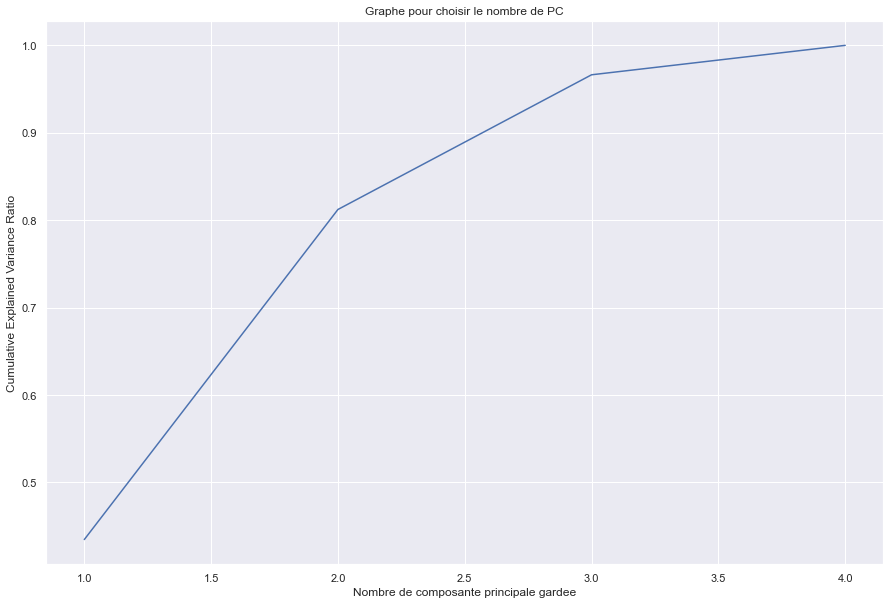

In [161]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15,10))
sns.lineplot([i for i in range(1, len(cumsum) + 1)], cumsum)
plt.xlabel('Nombre de composante principale gardee')
plt.ylabel('Cumulative Explained Variance Ratio') # Ratio d'Informations (==variance) Conservees
plt.title('Graphe pour choisir le nombre de PC')
plt.ioff()

# Random Forest

In [150]:
# Pipeline
pipeline_details = [('RF', RF())]
pipeline = Pipeline(steps=pipeline_details)

# Hyper parameters
hyperparameters = {}
hyperparameters['RF__n_estimators']  = [i for i in range(80, 120 +1, 10)]
hyperparameters['RF__criterion']  = ['gini', 'entropy']
hyperparameters['RF__max_depth']  = [i for i in range(1, 11)]
hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=3)
hyperparameter_search.fit(X_train, Y_train)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

# RF
rfNEstimators = hyperparameter_search.best_params_['RF__n_estimators']
rfCriterion = hyperparameter_search.best_params_['RF__criterion']
rfMaxDepth = hyperparameter_search.best_params_['RF__max_depth']
rf = RF(n_estimators = rfNEstimators, criterion = rfCriterion, max_depth = rfMaxDepth)
rf.fit(X_tr_PCA, Y_train);

train_preds = rf.predict(X_te_PCA)
train_proba = rf.predict_proba(X_te_PCA)
print('RandomForestAccuracy : {}'.format(accuracy(train_preds, Y_test)))

Meilleur score : 0.50553
Meilleur paramètres : {'RF__criterion': 'entropy', 'RF__max_depth': 10, 'RF__n_estimators': 80}
RandomForestAccuracy : 0.3932672198610268


In [151]:
# RF sans Pipeline
rfNEstimators = 90
rfCriterion = 'entropy'
rfMaxDepth = 10
rf = RF(n_estimators = rfNEstimators, criterion = rfCriterion, max_depth = rfMaxDepth)
rf.fit(X_tr_PCA, Y_train);

train_preds = rf.predict(X_te_PCA)
train_proba = rf.predict_proba(X_te_PCA)
print('RandomForestAccuracy : {}'.format(accuracy(train_preds, Y_test)))

RandomForestAccuracy : 0.3920259056871079


# K Nearest Neighbors

In [ ]:
# Pipeline
pipeline_details = [('KNN', KNN())]
pipeline = Pipeline(steps=pipeline_details)

# Hyper parameters
hyperparameters = {}
hyperparameters['KNN__n_neighbors'] = [1, 3, 5, 7, 11, 13]
hyperparameters['KNN__weights'] = ['uniform', 'distance']
hyperparameters['KNN__algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=3)
hyperparameter_search.fit(X_train, Y_train)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

# KNN
knnNNeighbors = hyperparameter_search.best_params_['KNN__n_neighbors']
knnWeights = hyperparameter_search.best_params_['KNN__weights']
knnAlgorithm = hyperparameter_search.best_params_['KNN__algorithm']
knn = KNN(n_neighbors = knnNNeighbors, weights = knnWeights, algorithm = knnAlgorithm)
knn.fit(X_tr_PCA, Y_train);

train_preds = knn.predict(X_te_PCA)
print('KNearestNeighborsAccuracy : {}'.format(accuracy(train_preds, Y_test)))

In [176]:
# Sans Pipeline
knn = KNN()
knn.fit(X_tr_PCA, Y_train);

train_preds = knn.predict(X_te_PCA)
print('KNearestNeighborsAccuracy : {}'.format(accuracy(train_preds, Y_test)))

KNearestNeighborsAccuracy : 0.44992241786413006


# SVC

In [ ]:
# Pipeline
pipeline_details = [('SVC', SVC())]
pipeline = Pipeline(steps=pipeline_details)

# Hyper parameters
hyperparameters = {}
hyperparameters['SVC__degree'] = [i for i in range(1, 11)]
hyperparameters['SVC__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid'] # precomputed can only be used with a square matrix
hyperparameters['SVC__C'] = np.arange(1.0, 7.0)
hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=3)
hyperparameter_search.fit(X_train, Y_train)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

# SVC
svcDegree = hyperparameter_search.best_params_['SVC__degree']
scvKernel = hyperparameter_search.best_params_['SVC__kernel']
scvC = hyperparameter_search.best_params_['SVC__C']
svc = SVC(C = scvC, kernel = scvKernel, degree = svcDegree)
svc.fit(X_tr_PCA, Y_train);

train_preds = svc.predict(X_te_PCA)
print('SVCAccuracy : {}'.format(accuracy(train_preds, Y_test)))

In [ ]:
# Sans Pipeline
svc = SVC()
svc.fit(X_tr_PCA, Y_train);

train_preds = svc.predict(X_te_PCA)
print('SVCAccuracy : {}'.format(accuracy(train_preds, Y_test)))

A partir de l'execution du SVC mon noyau a crash... Tout en sachant qu'il était lancé depuis plus de 3h.. Au passage, j'ai accidentellement relancé ma cellule de KNN avec le pipeline, je ne sais donc pas quels sont les meilleurs hyperparametres...

# Features Importance (RandomForest)

Somme des pouvoirs predictif : 1.0
L'échelle du pouvoir prédictif est en %


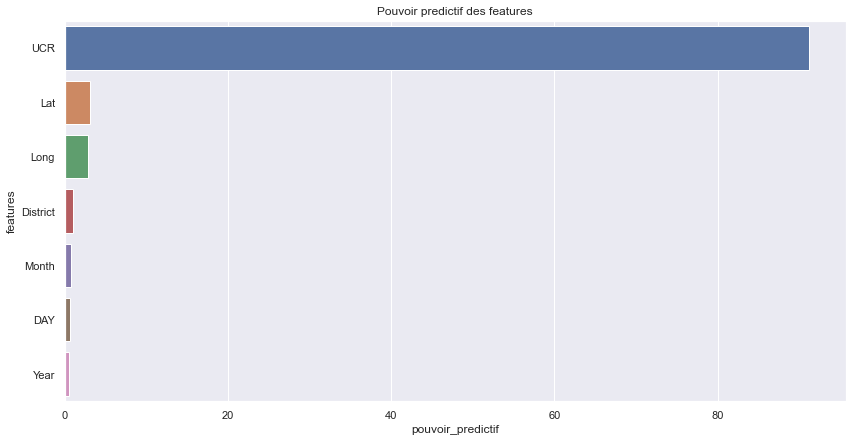

In [163]:
# Ré-entrainement des models pour avoir l'importances de toutes les features
rf.fit(X_train, Y_train)
importances = rf.feature_importances_
train_preds = rf.predict(X_test)

# creation du barplot pour mieux montré l'importance des features du model
plt.figure(figsize=(14,7))

d = pd.DataFrame()
d['features'] = X_train.columns
d['pouvoir_predictif'] = importances
print('Somme des pouvoirs predictif : {}'.format(d['pouvoir_predictif'].sum()))
d['pouvoir_predictif'] = d['pouvoir_predictif'].apply(lambda v : v*100)
d = d.sort_values(by='pouvoir_predictif', ascending=False)
sns.barplot(d['pouvoir_predictif'], d['features']).set_title('Pouvoir predictif des features');
print("L'échelle du pouvoir prédictif est en %")

# Matrice de confusion

Matrice de confusion :


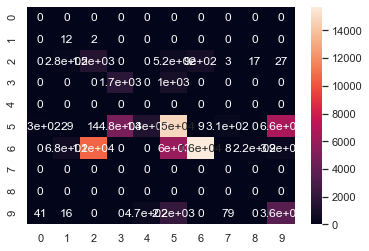

In [169]:
classes = Y.astype('category').cat.categories.tolist()
cm = confusion_matrix(train_preds, Y_test, labels=classes)
show_cm(cm, classes)

# Courbe ROC

10


<Figure size 432x288 with 0 Axes>

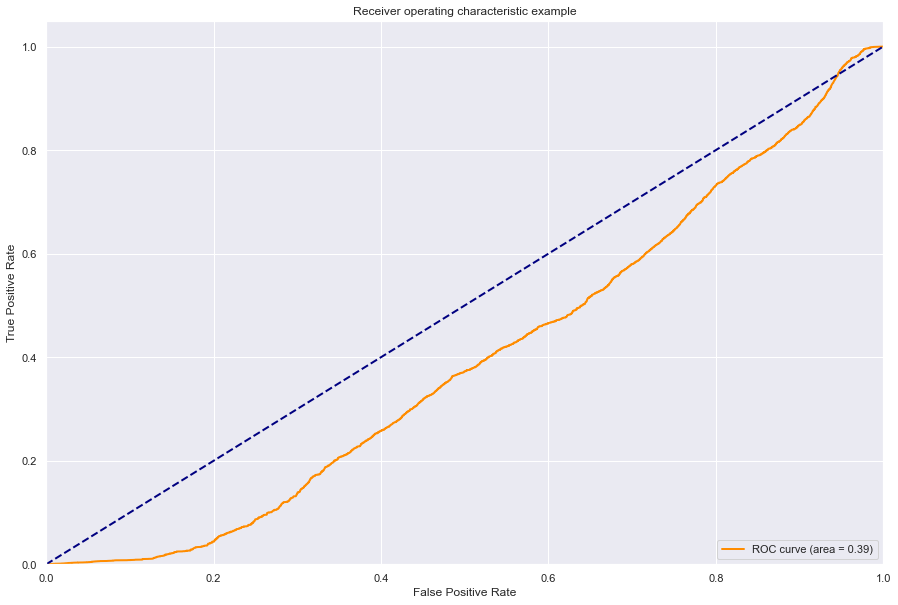

In [173]:
classes = Y.astype('category').cat.categories.tolist()
n_classes = len(classes)
n_classes = Y.nunique()
print(n_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
pos = 9
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, train_proba[:, i], pos_label = pos)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), train_proba[:, i].ravel(), pos_label = pos)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.figure(figsize=(15,10))
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()